In this notebook, we will process and analyze the 41 eligible papers that came out of our survey to track their basic characteristics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, OrderedDict
from pywaffle import Waffle
import plotly.express as px
import matplotlib
import plotly.graph_objects as go

import plotly.io as pio
pio.templates.default = 'seaborn'

In [2]:
initial_file = pd.read_csv('Eligble_papers.csv')

In [3]:
num_papers = len(initial_file)

In [4]:
save_loc = 'plots/'

In [5]:
print(initial_file.columns)

Index(['Index', 'State', 'Title', 'Dataset used', 'Dataset_used_clean',
       'Problem', 'Algorithms', 'Type of feedback', 'Solution', 'Metrics',
       'Result on book dataset', 'Type of prediction', 'Bias definition',
       'Considers book characteristics', 'Dataset preprocessing',
       'Dataset_preprocessing_reput', 'Bias perspective',
       'Bias_perspective_reput', 'Hyperparameter tuning', 'Code provided',
       'Code_linked_reput', 'Framework', 'Bias type', 'Bias_type_reput',
       'Action', 'Link', 'Venue', 'Venue_renamed', 'Publisher', 'Type',
       'Year'],
      dtype='object')


In [6]:
hist_columns = ['Dataset used', 'Type of feedback', 'Type of prediction', 'Considers book characteristics', 'Dataset preprocessing', 'Bias perspective', 'Hyperparameter tuning', 'Code provided', 'Framework',
                'Bias type', 'Action']

# A. Papers per...

## Papers per year

In [6]:
papers_per_year = dict(Counter(initial_file.Year))
for year in range(min(papers_per_year.keys()),max(papers_per_year.keys())+1):
    if year not in papers_per_year.keys():
        papers_per_year[year] = 0
# papers_per_year=pd.Series(papers_per_year).sort_index()
papers_per_year = OrderedDict(sorted(papers_per_year.items()))


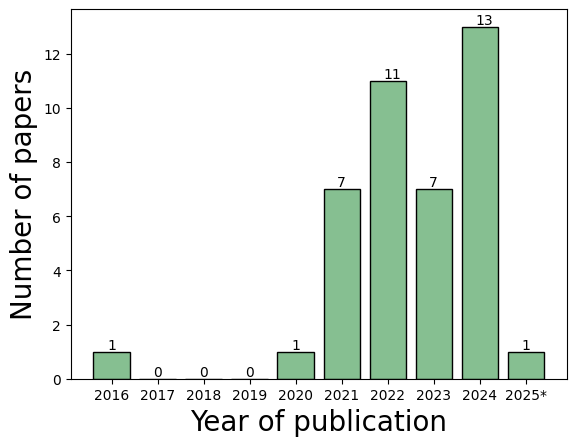

In [21]:
ax = plt.subplot()
x = list(papers_per_year.keys())
y = list(papers_per_year.values())
plt.bar(x,y, align='center', color = '#86bf91',edgecolor='black' )
ax.set_xticks(x)
ax.set_xticklabels(x[:-1]+['2025*'], fontsize=10)
ax.set_xlabel('Year of publication', fontsize=20, )
ax.set_ylabel('Number of papers', fontsize=20, )


for i, v in enumerate(y):
    plt.text(x[i] - 0.1, v + 0.1, str(v))
plt.savefig(save_loc+"per_year.png", 
            bbox_inches ="tight", 
            pad_inches = 1, 
            transparent = True, 
            orientation ='landscape') 

plt.show()

## Papers per venue

In [102]:
counts = Counter(initial_file.Venue_renamed)

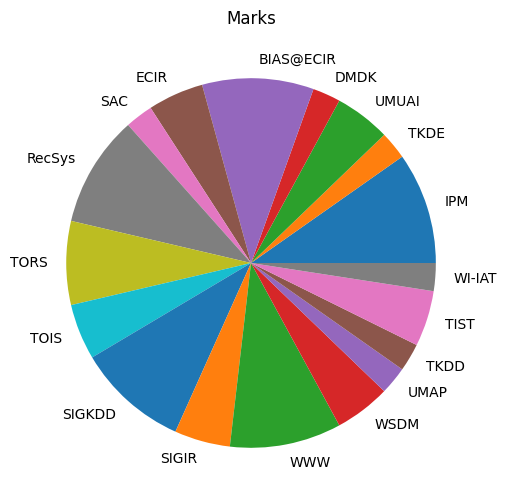

In [103]:
x,y = list(counts.keys()), list(counts.values())
plt.figure(figsize=(6,6))
plt.pie(y, labels=x)
plt.title("Marks")
plt.show()
plt.close()

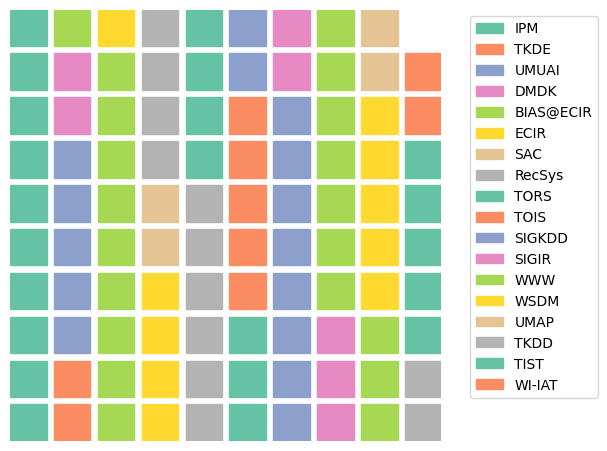

In [104]:
plt.figure(FigureClass=Waffle,
           rows = 10,
           columns = 10,
           values = counts,
           legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)},
)
plt.show()

In [105]:
per_venue = initial_file.drop_duplicates('Venue_renamed')[['Venue_renamed','Publisher']].reset_index(drop=True).set_index('Venue_renamed')
per_venue

,Publisher
Venue_renamed,
IPM,Elsevier
TKDE,IEEE
UMUAI,Springer
DMDK,Springer
BIAS@ECIR,Springer
ECIR,Springer
SAC,ACM
RecSys,ACM
TORS,ACM


In [106]:
per_venue['Count_per_venue'] = ''
for key in counts.keys():
    per_venue.at[key, 'Count_per_venue'] = counts[key]
per_venue = per_venue.reset_index(drop=False)
per_venue

,Venue_renamed,Publisher,Count_per_venue
0,IPM,Elsevier,4
1,TKDE,IEEE,1
2,UMUAI,Springer,2
3,DMDK,Springer,1
4,BIAS@ECIR,Springer,4
5,ECIR,Springer,2
6,SAC,ACM,1
7,RecSys,ACM,4
8,TORS,ACM,3
9,TOIS,ACM,2


In [107]:


# plotly express figure
fig = px.sunburst(per_venue, path=["Publisher", "Venue_renamed"], values='Count_per_venue')
# fig.show()


# # plotly graph_objects figure
# fig =go.Figure(go.Sunburst(
#                 labels=fig1['data'][0]['labels'].tolist(),
#                 parents=fig1['data'][0]['parents'].tolist(),
#                 values = fig1['data'][0]['values'].tolist(),
#                 insidetextorientation='radial',
#                 branchvalues="total"),
                
#                 )
fig.update_layout(
    margin = dict(t=0, l=0, r=0, b=0),
)
# fig.update_layout(uniformtext=dict(minsize=1, mode='hide'),
#                    template = 'seaborn')



fig.update_layout(
    title=dict(text="Venue and publisher", font=dict(size=30), automargin=True, yref='paper', y=0)
)



fig.update_layout(
   width=800, height=800
)
fig.update_traces(hoverinfo = 'label+percent parent', textinfo = 'label+percent root')
fig.update_traces(textfont=dict(size=30))


fig.update_traces(insidetextorientation='radial')
fig.show()
fig.write_image(save_loc+"per_venue.png")


## Papers per dataset

In [49]:
def flatten(xss):
    return [x for xs in xss for x in xs]

In [50]:
unique_dataset_appearances = flatten([x.split(', ') for x in initial_file.Dataset_used_clean])

In [51]:
papers_per_dataset = dict(Counter(unique_dataset_appearances))
papers_per_dataset

{'Amazon-books': 8,
 'Book-crossing': 26,
 'GoodReads': 8,
 'Goodbooks': 1,
 'LibraryThing': 1,
 'Amazon-kindle': 1}

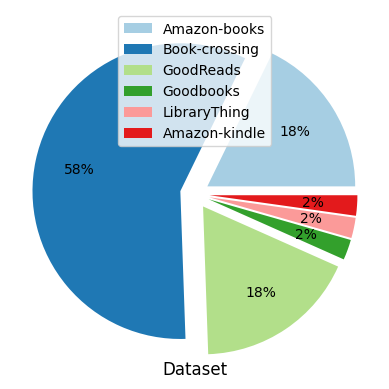

In [118]:
ax = plt.subplot()
x = list(papers_per_dataset.keys())
y = list(papers_per_dataset.values())
# plt.bar(x,y, align='center', color = '#86bf91',edgecolor='black' )
myexplode = [0.1, 0.1, 0.1, 0.1, 0.1,  0.1]

plt.pie(y,  startangle = 0, explode = myexplode, shadow=False , autopct='%1.0f%%', pctdistance=0.7, colors=sns.color_palette('Paired'))
plt.legend(labels = x)

# ax.set_xticks(x)
# ax.set_xticklabels(x, fontsize=5)
# ax.set_xlabel('Dataset', fontsize=20, )
# ax.set_ylabel('Number of papers', fontsize=20, )
ax.set_title('Dataset', y=-0.01)


plt.savefig(save_loc+"per_dataset.png", 
            bbox_inches ="tight", 
            pad_inches = 1, 
            transparent = True, 
            orientation ='landscape') 

plt.show()

## Papers per type of feature/prediction task

In [6]:
result = initial_file.groupby(['Type of prediction', 'Type of feedback']).size().reset_index(name='Counts')
result

,Type of prediction,Type of feedback,Counts
0,Both,Explicit,9
1,Irrelevant,Explicit,1
2,Ranking,Both,2
3,Ranking,Explicit,5
4,Ranking,Implicit,18
5,Ranking,Unclear,3
6,Rating,Explicit,3


In [7]:


# plotly express figure
fig = px.sunburst(result, path=["Type of feedback", "Type of prediction"], values='Counts')
fig.show()


# # plotly graph_objects figure
# fig =go.Figure(go.Sunburst(
#                 labels=fig1['data'][0]['labels'].tolist(),
#                 parents=fig1['data'][0]['parents'].tolist(),
#                 values = fig1['data'][0]['values'].tolist(),
#                 insidetextorientation='radial',
#                 branchvalues="total"),
                
#                 )
fig.update_layout(
    margin = dict(t=0, l=0, r=0, b=0),
)
# fig.update_layout(uniformtext=dict(minsize=1, mode='hide'),
#                    template = 'seaborn')



fig.update_layout(
    title=dict(text="Prediction task and type of feedback", font=dict(size=30), automargin=True, yref='paper', y=0)
)



fig.update_layout(
   width=800, height=800
)
fig.update_traces(hoverinfo = 'label+percent parent', textinfo = 'label+percent root')
fig.update_traces(textfont=dict(size=30))


fig.update_traces(insidetextorientation='horizontal')
fig.show()


fig.write_image(save_loc+"per_top.png")


## Papers per type of bias

In [12]:
Counter(initial_file['Bias_type_reput'])

Counter({'Statistical': 28, 'Social': 13})

In [10]:
Counter(initial_file['Bias_perspective_reput'])

Counter({'Item': 21, 'User': 11, 'Uncategorized': 2, 'Joint': 7})

In [9]:
result = initial_file.groupby(['Action','Bias_perspective_reput', 'Bias_type_reput']).size().reset_index(name='Counts')
result

,Action,Bias_perspective_reput,Bias_type_reput,Counts
0,Measuring,Item,Social,3
1,Measuring,Item,Statistical,1
2,Measuring,Joint,Statistical,3
3,Measuring,Uncategorized,Statistical,1
4,Measuring,User,Social,2
5,Measuring,User,Statistical,2
6,Mitigating,Item,Social,3
7,Mitigating,Item,Statistical,14
8,Mitigating,Joint,Social,1
9,Mitigating,Joint,Statistical,3


In [15]:


# plotly express figure
fig = px.sunburst(result, path=["Bias_type_reput", "Bias_perspective_reput", "Action"], values='Counts')
fig.show()


# # plotly graph_objects figure
# fig =go.Figure(go.Sunburst(
#                 labels=fig1['data'][0]['labels'].tolist(),
#                 parents=fig1['data'][0]['parents'].tolist(),
#                 values = fig1['data'][0]['values'].tolist(),
#                 insidetextorientation='radial',
#                 branchvalues="total"),
                
#                 )
fig.update_layout(
    margin = dict(t=0, l=0, r=0, b=0),
)
# fig.update_layout(uniformtext=dict(minsize=1, mode='hide'),
#                    template = 'seaborn')



fig.update_layout(
    title=dict(text="Type of bias and action", font=dict(size=30), automargin=True, yref='paper', y=0)
)



fig.update_layout(
   width=800, height=800
)
fig.update_traces(hoverinfo = 'label+percent parent', textinfo = 'label+percent root')
fig.update_traces(textfont=dict(size=30))


fig.update_traces(insidetextorientation='horizontal')
fig.show()


fig.write_image(save_loc+"per_bias.png")


## Papers per code and preprocessing

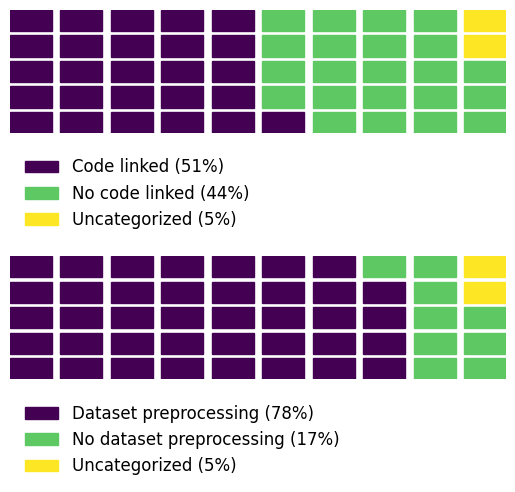

In [22]:
font = {'size'   : 12}
matplotlib.rc('font', **font)

fig, (ax1, ax2) = plt.subplots(2)
# fig.suptitle('Vertically stacked subplots')
counts = dict(Counter(initial_file.Code_linked_reput).most_common())

names = ['Code linked', 'No code linked', 'Uncategorized']
counts[names[0]] = counts.pop('Yes')
counts[names[1]] = counts.pop('No')
counts[names[2]] = counts.pop('Uncategorized')

Waffle.make_waffle(ax = ax1,
                  rows = 5,
           columns = 10,
           values = counts,
           colors = ['#440154','#5ec962','#fde725'],
           labels=["{0} ({1}%)".format(k, int(np.round(v/num_papers*100))) for k, v in counts.items()],
           legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.9), 'ncol': 1, 'framealpha': 0} )

counts = dict(Counter(initial_file.Dataset_preprocessing_reput).most_common())
names = ['Dataset preprocessing', 'No dataset preprocessing', 'Uncategorized']
counts[names[0]] = counts.pop('Yes')
counts[names[1]] = counts.pop('No')
counts[names[2]] = counts.pop('Uncategorized')

Waffle.make_waffle(ax = ax2,
                  rows = 5,
           columns = 10,
           values = counts,
           colors = ['#440154','#5ec962','#fde725'],
           labels=["{0} ({1}%)".format(k, int(np.round(v/num_papers*100))) for k, v in counts.items()],
           legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.9), 'ncol': 1, 'framealpha': 0} )
plt.subplots_adjust(hspace=1)


plt.savefig(save_loc+"per_code_prepr.png", 
            bbox_inches ="tight", 
            pad_inches = 1, 
            transparent = True, 
            orientation ='landscape') 
plt.show()



# B. Zoom in!

In [7]:
def filter_through(df, list_of_columns_and_properties_to_include = [], list_of_columns_and_properties_to_not_include = []):
    dff = df.copy()
    for tup in list_of_columns_and_properties_to_include:
        dff = dff[dff[tup[0]].str.contains(tup[1])]
    for tup in list_of_columns_and_properties_to_not_include:
        dff = dff[dff[tup[0]].str.contains(tup[1])==False]
    return dff

In [8]:
initial_file = initial_file.fillna('None value')

In [15]:
include = [('Bias perspective', 'Item'), ("Bias type", "Popularity")]
not_include = []

In [23]:
filter_through(initial_file, include, not_include)[['Index', 'Title','Problem', 'Bias type', 'Action', 'Bias perspective', 'Year', 'Dataset used']]

,Index,Title,Problem,Bias type,Action,Bias perspective,Year,Dataset used
0,1.0,Flexibly manipulating popularity bias for tack...,Popularity bias is hard to deal with because s...,"Popularity, Statistical",Mitigating,Item,2024,Amazon-books
3,5.0,Provider fairness across continents in collabo...,"Items (movies, books) may be exposed different...","Exposure, Popularity, Statistical, Visibility",Mitigating,"Provider, Item",2022,Book-crossing
8,11.0,The Unfairness of Popularity Bias in Book Reco...,Popularity bias.,"Popularity, Statistical",Measuring,"Item, User",2022,Book-crossing
9,12.0,Popularity Bias in Collaborative Filtering-Bas...,Popularity bias that leads to the underreprese...,"Popularity, Statistical",Measuring,"Item, User",2022,Book-crossing
14,17.1,On the instability of embeddings for recommend...,MF embeddings are unstable and are very differ...,"Popularity, Statistical",Mitigating,Item,2021,Book-crossing
16,20.0,Reproducing Popularity Bias in Recommendation:...,Different studies so different results when it...,"Popularity, Statistical",Measuring,"Item, User",2024,Book-crossing
17,21.0,Toward Bias-Agnostic Recommender Systems: A Un...,"Debiasing methods are too ad hoc, bias-specifi...","Bias-agnostic, Popularity, Statistical",Mitigating,Item,2024,Book-crossing
19,23.0,A Personalized Framework for Consumer and Prod...,RS fairness work usually treats user and item ...,"Popularity, Statistical, User activity",Mitigating,"Provider, User, Item",2024,Book-crossing
20,24.0,Biased User History Synthesis for Personalized...,Long-tail items are underrecommended.,"Popularity, Statistical",Mitigating,Item,2024,Book-crossing
21,25.0,Countering Popularity Bias by Regularizing Sco...,The data is long tail and the RS could give un...,"Popularity, Statistical",Mitigating,Item,2022,GoodReads
